# Blending Hex Colors
Find some colors and create a palette of hex color values with those as anchor points.

In [1]:
import numpy as np
from string import hexdigits
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from mycolorpy import colorlist as mcp

## [Go Find Some Colors](https://g.co/kgs/DDXXi4y)

## Hexadecimal Space
like np.linspace, but with hexadecimals and a specified number of additions in the middle

In [2]:
def array_hexes(hex_one, hex_two, fillers=1):
    """
    Given two hexadecimal numbers
     and the number of intermediary numbers wanted
    Returns linear distribution of hexes
    """
    start_int = int(hex_one, 16)
    end_int = int(hex_two, 16)
    hexes = np.linspace(start_int, end_int, 2+fillers)
    hexes = [f'{hex(int(n))[2:]:02}' for n in hexes]
    
    return hexes

print(array_hexes.__doc__)
print(array_hexes('00', 'ff', 3,))


    Given two hexadecimal numbers
     and the number of intermediary numbers wanted
    Returns linear distribution of hexes
    
['00', '3f', '7f', 'bf', 'ff']


## Hex Color Space
creates a list of hex colors with a specified number of intermediatries

In [3]:
def array_hex_colors(hex_color_one, hex_color_two, fillers=1):
    """
    Given two hex-code colors
     and the number of intermediary colors wanted
    Returns linear distribution of hex colors
    """
    reds = array_hexes(hex_color_one[1:3], hex_color_two[1:3], fillers)
    greens = array_hexes(hex_color_one[3:5], hex_color_two[3:5], fillers)
    blues = array_hexes(hex_color_one[5:7], hex_color_two[5:7], fillers)
    colors = []
    for i in range(fillers+2):
        colors.append('#'+reds[i]+greens[i]+blues[i])
    return colors
    
print(array_hex_colors.__doc__)
print(array_hex_colors('#000000', '#ffffff', 4,))


    Given two hex-code colors
     and the number of intermediary colors wanted
    Returns linear distribution of hex colors
    
['#000000', '#333333', '#666666', '#999999', '#cccccc', '#ffffff']


## Hex Color Multi Space
creates a list of colors, but with some specified intermediaries

In [4]:
def array_palette(hexes, fillers):
    """
    Takes list of hex color codes
      and number of fillers after each code
      before the next hex color code
      (last filler ignored, if provided)
    Returns list of hex code colors with fillers
    """
    color_list = []
    for c in range(len(hexes)-1):
        new_colors = array_hex_colors(hexes[c], hexes[c+1], fillers[c])
        color_list = new_colors if c == 0 else color_list + new_colors[1:]
    return color_list

print(array_palette.__doc__)
print(array_palette(['#000000', '#ff00ff', '#ffffff'], 
                    [2,          4]))


    Takes list of hex color codes
      and number of fillers after each code
      before the next hex color code
      (last filler ignored, if provided)
    Returns list of hex code colors with fillers
    
['#000000', '#550055', '#aa00aa', '#ff00ff', '#ff33ff', '#ff66ff', '#ff99ff', '#ffccff', '#ffffff']


## Hex Color Palette Plot
plots a list of hex colors

In [5]:
def plot_palette(hexes):
    """
    Takes list of color hex code colors
    Plots these colors with hex labels
    """
    
    num_colors = len(hexes)
    width = num_colors if num_colors < 16 else 16

    fig, axes = plt.subplots(1, 1, figsize=(width,1))
    axes.imshow(to_rgba_array(hexes).reshape(1, num_colors, 4))
    axes.spines[:].set_visible(False)
    axes.set_xticks(range(num_colors))
    axes.set_xticklabels(hexes)
    axes.set_yticks([])
    if num_colors > 16:
        plt.xticks(rotation=30)    
    plt.show()

print(plot_palette.__doc__)


    Takes list of color hex code colors
    Plots these colors with hex labels
    


## Testing

### [Find Colors](https://g.co/kgs/DDXXi4y)

['#e9002a', '#d51254', '#c1257f', '#ad37a9', '#9a4ad4', '#8351d3', '#6c58d2', '#555fd1', '#3f66d1']


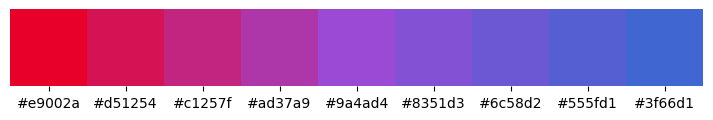

In [17]:
color_palette = array_palette(['#e9002a', '#9a4ad4', '#3f66d1', ], 
                              [ 3,         3,                   ])
                                # Red     # Purple   # Blue
print(color_palette)
plot_palette(color_palette)

['#eb3110', '#e98e44', '#e7eb78', '#b0e7b1', '#7ae3eb', '#65b8e9', '#518ee8', '#487adc', '#3f66d1']


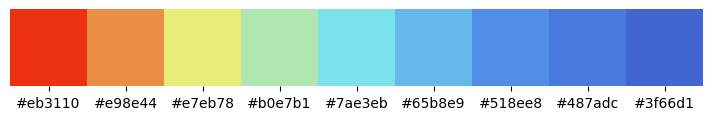

In [20]:
color_palette = array_palette(['#eb3110', '#e7eb78', '#7ae3eb', '#518ee8', '#3f66d1'], 
                              [ 1,         1,         1,         1,         1       ])
                              # Red        Yellow     L Blue     M Blue     Blue
print(color_palette)
plot_palette(color_palette)